# IPSENSE internship project

This project was made by **Matheus Bellucio**. contact me on this email: matheusbellucio@gmail.com

<hr>

### Imports

In [115]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from typing import Callable

import requests
import json

<hr>

## Project Gutenberg Analysis

Project Gutenberg is an online library of free eBooks.

On this analysis we are going to look for some interesting data revolving around this free innitiative, those being:
- Most Downloaded Books

<hr>

### API endpoints

In [34]:
HEADERS = {
  'Content-Type': 'application/json',
  'Accept': 'application/json'
}

In [35]:
BOOKS = 'https://gutendex.com/books/'

In [76]:
NUM_PAGES = 156

### API Calls

In [36]:
def fetchJson(url: str, headers: dict) -> dict[str, any]:
  try: 
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    return response.json()
  except requests.exceptions.RequestException as err: 
    raise err

### Dataframe creation and Data formatting 

In [74]:
def get_data(fetch_data: Callable, url: str, headers: dict, num_pages: int) -> pd.DataFrame:

  data = []
  first_page = fetch_data(url=url, headers=headers)
  data.extend(first_page['results'])
  page_link = first_page['next']

  for i in range(1, num_pages):
    page = fetch_data(url=page_link, headers=headers)
    data.extend(page['results'])
    page_link = page['next']

  return pd.DataFrame(data)

Due to the API being paginated, the wait time is too long. Therefore i will base this analysis on a 5000 books frame.

To avoid waiting 8 minutes to all the data being fetched, simply comment the first line bellow and uncomment the second one.

In [77]:
df_books = get_data(fetch_data=fetchJson, url=BOOKS, headers=HEADERS, num_pages=NUM_PAGES)
# df_books = pd.read_json('./data.json')

### Exploring the data

In [78]:
df_books.columns

Index(['id', 'title', 'authors', 'translators', 'subjects', 'bookshelves',
       'languages', 'copyright', 'media_type', 'formats', 'download_count'],
      dtype='object')

In [79]:
print(df_books.shape)
df_books.head()

(4992, 11)


,id,title,authors,translators,subjects,bookshelves,languages,copyright,media_type,formats,download_count
0,1513,Romeo and Juliet,"[{'name': 'Shakespeare, William', 'birth_year'...",[],"[Conflict of generations -- Drama, Juliet (Fic...","[Browsing: Fiction, Browsing: Literature, Brow...",[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,79350
1,2701,"Moby Dick; Or, The Whale","[{'name': 'Melville, Herman', 'birth_year': 18...",[],"[Adventure stories, Ahab, Captain (Fictitious ...","[Best Books Ever Listings, Browsing: Fiction, ...",[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,72591
2,1342,Pride and Prejudice,"[{'name': 'Austen, Jane', 'birth_year': 1775, ...",[],"[Courtship -- Fiction, Domestic fiction, Engla...","[Best Books Ever Listings, Browsing: Culture/C...",[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,58898
3,37106,"Little Women; Or, Meg, Jo, Beth, and Amy","[{'name': 'Alcott, Louisa May', 'birth_year': ...",[],"[Autobiographical fiction, Bildungsromans, Dom...",[],[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,53439
4,145,Middlemarch,"[{'name': 'Eliot, George', 'birth_year': 1819,...",[],"[Bildungsromans, City and town life -- Fiction...","[Best Books Ever Listings, Browsing: Culture/C...",[en],False,Text,{'text/html': 'https://www.gutenberg.org/ebook...,53226


In [80]:
df_books.describe()

,id,download_count
count,4992.000000,4992.000000
mean,27398.947917,1069.541667
std,21731.059577,3399.976282
min,1.000000,283.000000
25%,6778.500000,346.000000
50%,25476.000000,462.000000
75%,42864.500000,784.000000
max,74328.000000,79350.000000


In [81]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              4992 non-null   int64 
 1   title           4992 non-null   object
 2   authors         4992 non-null   object
 3   translators     4992 non-null   object
 4   subjects        4992 non-null   object
 5   bookshelves     4992 non-null   object
 6   languages       4992 non-null   object
 7   copyright       4992 non-null   bool  
 8   media_type      4992 non-null   object
 9   formats         4992 non-null   object
 10  download_count  4992 non-null   int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 395.0+ KB


<hr>

# General statistics

### Books per Author

In [96]:
def get_author_name(authors):
    if isinstance(authors, dict) and 'name' in authors:
        return authors['name']
    elif isinstance(authors, list) and len(authors) > 0:
        return authors[0].get('name', '')
    return ''


In [100]:
books_per_author = df_books['authors'].apply(get_author_name).value_counts()
print('Books per author: ')
books_per_author.head(10)[2:]

Books per author: 


authors
Dickens, Charles                 49
Shakespeare, William             46
Twain, Mark                      45
Anonymous                        44
Wells, H. G. (Herbert George)    28
Plato                            28
Conrad, Joseph                   27
Montgomery, L. M. (Lucy Maud)    26
Name: count, dtype: int64

As we can see, Charles Dickens is the author with the most books in this Data Analysis, followed by Shakespeare.

### Top 10 Genres

In [102]:
popular_subjects = df_books['subjects'].explode().value_counts()
print("\nMost Popular Subjects:")
print(popular_subjects.head(10))


Most Popular Subjects:
subjects
Short stories            151
Science fiction          141
Love stories             105
England -- Fiction       103
Historical fiction       103
Adventure stories        100
Psychological fiction     98
Domestic fiction          91
Fairy tales               78
Bildungsromans            76
Name: count, dtype: int64


In Project Gutenberg, apparently the book genre that has the most books is Short Stories, followed up by Science Fiction.<br>
The real surprise here is the genre 'Bildungsromans' being in the 10th position.

### Top 10 most downloaded books

In [112]:
most_downloaded_books = df_books.sort_values('download_count', ascending=False).head(10)

top_downloads_bar = px.bar(
  x=most_downloaded_books.title, 
  y=most_downloaded_books.download_count, 
  title='Top 10 most downloaded books',
  height=700
)
top_downloads_bar.show()

We can conclude that the classic books are indeed the most downloaded, with a romance novel being in the 1st position, <br> 
although the romance genre being the 3rd most common genre.

# Relation between author Birth Year and Downloads/Popularity

In [147]:
def get_author_birth_year(authors):
    if isinstance(authors, list) and len(authors) > 0:
        return authors[0].get('birth_year', None)
    return None

In [149]:
df_books['author_birth_year'] = df_books['authors'].apply(get_author_birth_year)

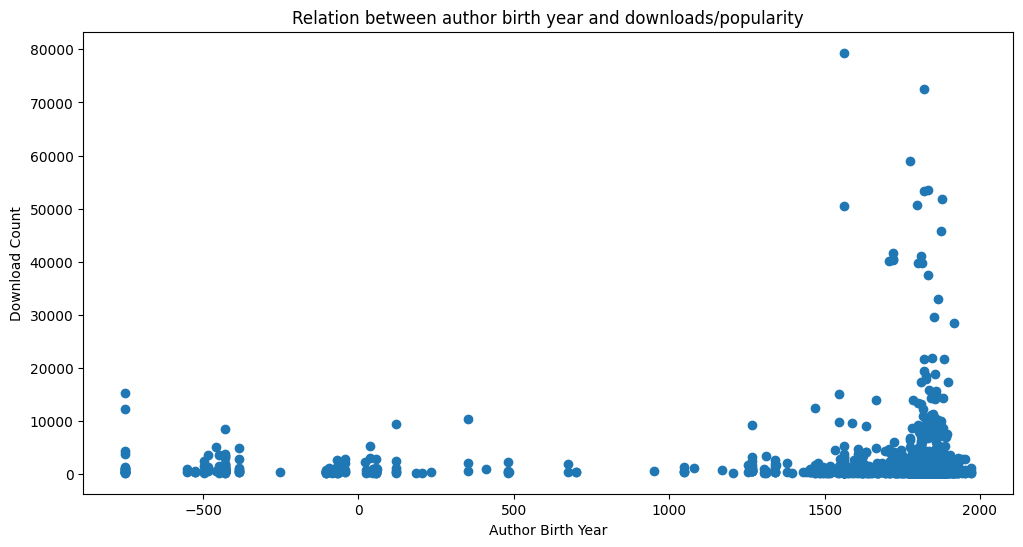

In [150]:
plt.figure(figsize=(12, 6))
plt.scatter(df_books['author_birth_year'], df_books['download_count'])
plt.xlabel('Author Birth Year')
plt.ylabel('Download Count')
plt.title('Relation between author birth year and downloads/popularity')
plt.xticks()
plt.show()

As we can see, the most downloaded books are from the 17th, 18th and 19th century. We can therefore conclude that the Project Gutenberg has a vital role of exposing old literature to this new digital world, bringing people the the views and sentiments of the past generations, across multiple centuries.

# Most popular Authors

In [166]:
df_books['first_author'] = df_books['authors'].apply(lambda x: x[0]['name'] if isinstance(x, list) and len(x) > 0 else 'Unknown')

author_download_counts = df_books.groupby('first_author').agg({'download_count': 'sum'}).reset_index()
author_download_counts.columns = ['Author', 'Total Downloads']
author_download_counts = author_download_counts[author_download_counts['Author'] != 'Various']
author_download_counts = author_download_counts.sort_values('Total Downloads', ascending=False)[1:11]

In [170]:
author_download_counts.sample(2)

,Author,Total Downloads
621,"Dickens, Charles",86561
1963,"Smollett, T. (Tobias)",122876


<BarContainer object of 10 artists>

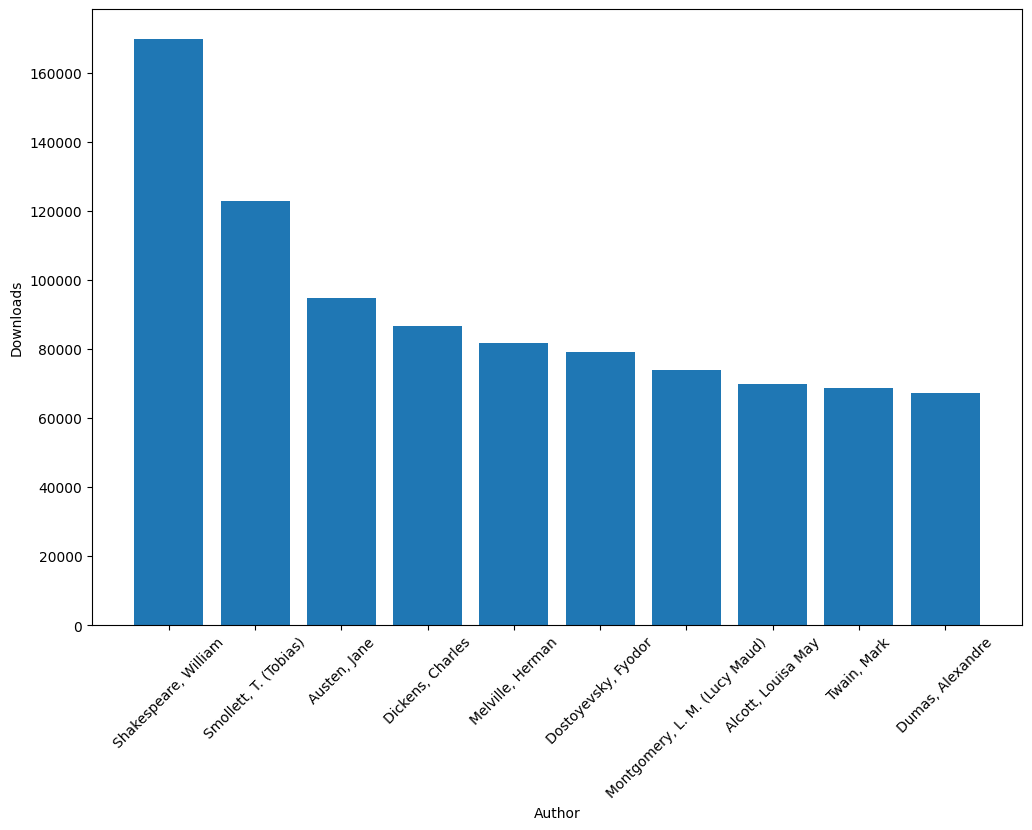

In [168]:
plt.figure(figsize=(12, 8))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel('Author')
plt.ylabel('Downloads')

plt.bar(author_download_counts['Author'], author_download_counts['Total Downloads'])

Indeed, an author from the 17th century has the most downloads in books published combined. It matches with the last analysis we did.